In [15]:
import numpy as np
from sklearn.decomposition import NMF

In [16]:
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
X

array([[1. , 1. ],
       [2. , 1. ],
       [3. , 1.2],
       [4. , 1. ],
       [5. , 0.8],
       [6. , 1. ]])

In [37]:
model = NMF(n_components=4, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [38]:
W

array([[0.0073719 , 0.38152276, 0.02119153, 1.00738551],
       [0.99257817, 0.35357195, 0.20870409, 0.17641401],
       [1.59062378, 0.42310755, 0.11073997, 0.57491023],
       [1.61126987, 0.14604   , 0.8368694 , 0.72956764],
       [2.76360132, 0.09914683, 0.54926633, 0.55435315],
       [3.32507654, 0.1436632 , 0.62063806, 0.7037999 ]])

In [39]:
H

array([[1.35923776, 0.07390778],
       [0.64136376, 2.23143958],
       [1.43208554, 0.54503149],
       [0.70969435, 0.13556452]])

In [68]:
X_reconstructed = W.dot(H)

In [69]:
tol1 = 1e-3
np.allclose(X,X_reconstructed, rtol=tol1)

True

In [70]:
tol2 = 1e-4
np.allclose(X,X_reconstructed, rtol=tol2)

True

In [48]:
from numpy.linalg import norm

In [88]:
def nmf(X, com=3):
    w, h = X.shape
    print(w,h)
    W = np.random.rand(w,com)
    H = np.random.rand(com, h)
    cost = norm(X - W.dot(H))
    max_step = 1000
    step = 0
    tol = 1e-5
    cost_path = []
    while cost > tol and step < max_step:        
        step += 1
        num1 = W.T.dot(X)
        denum1 = W.T.dot(W.dot(H))
        H = np.multiply(H, np.divide(num1, denum1))
        
        num2 = X.dot(H.T)
        denum2 = W.dot(H.dot(H.T))
        W = np.multiply(W, np.divide(num2, denum2))
        cost = norm(X - W.dot(H))
        cost_path.append(cost)
    return W, H, cost_path

res = nmf(X, 5)
(W, H, cost_path) = res
X_reconstructed = W.dot(H)

assert np.allclose(X,X_reconstructed, rtol=tol)
X_reconstructed


6 2


array([[1.00000594, 0.99999406],
       [1.99999866, 1.00000268],
       [3.0000004 , 1.19999901],
       [3.99999948, 1.00000208],
       [5.00000027, 0.79999832],
       [5.99999948, 1.0000031 ]])

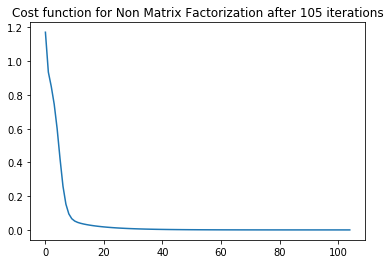

In [86]:
import matplotlib.pyplot as plt

plt.plot(cost_path)
plt.title(f"Cost function for Non Matrix Factorization after {len(cost_path)} iterations")
plt.show()